In [17]:
import matplotlib.pyplot as plt
import numpy as np
import os

from processed_data import GreyUTKFace
from skimage import io
from skimage import transform

## Make Grey UTKFace Dataset

In [2]:
%%time
input_path = 'raw_data/UTKFace/'

out_path = 'processed_data/GreyUTKFace/images/'
if not os.path.exists(out_path):
    os.makedirs(out_path)

    
for file in os.listdir(input_path):
    if '.jpg' not in file:
        continue
    img = io.imread(input_path + file, as_grey=True)
    img = transform.resize(img, (128, 128))
    io.imsave(out_path + file, img)

/data/anaconda/envs/py35/lib/python3.5/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/data/anaconda/envs/py35/lib/python3.5/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


CPU times: user 1min 24s, sys: 1.15 s, total: 1min 25s
Wall time: 1min 26s


# Plot Age Histogram

In [10]:
dataset = GreyUTKFace.Dataset(train=True)

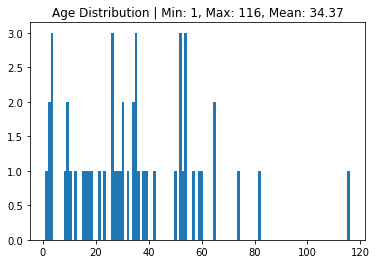

In [20]:
ages = [age for (img, age) in dataset]
max_age = max(ages)
min_age = min(ages)
mean_age = np.mean(ages)

plt.hist(ages, bins=max(ages))
plt.title("Age Distribution | Min: {0}, Max: {1}, Mean: {2:.2f}".format(min_age, max_age, mean_age))
plt.savefig('processed_data/GreyUTKFace/stats/age_distribution.png')